### CNN Training in Time Domain

In [1]:
import preprocessor.time_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess()
print(X_train.shape)

Reading: ./data/chb22/chb22_38.edf
Reading: ./data/chb15/chb15_49.edf
Reading: ./data/chb06/chb06_13.edf
Reading: ./data/chb21/chb21_19.edf
Reading: ./data/chb12/chb12_06.edf
Reading: ./data/chb15/chb15_40.edf
Reading: ./data/chb05/chb05_06.edf
Reading: ./data/chb12/chb12_11.edf
Reading: ./data/chb10/chb10_38.edf
Reading: ./data/chb15/chb15_54.edf
Reading: ./data/chb23/chb23_06.edf
Reading: ./data/chb11/chb11_92.edf
Reading: ./data/chb06/chb06_18.edf
Reading: ./data/chb13/chb13_21.edf
Reading: ./data/chb12/chb12_23.edf
Reading: ./data/chb12/chb12_36.edf
Reading: ./data/chb01/chb01_26.edf
Reading: ./data/chb05/chb05_17.edf
Reading: ./data/chb06/chb06_04.edf
Reading: ./data/chb20/chb20_16.edf
Reading: ./data/chb05/chb05_13.edf
Reading: ./data/chb14/chb14_03.edf
Reading: ./data/chb03/chb03_34.edf
Reading: ./data/chb19/chb19_28.edf
Reading: ./data/chb18/chb18_31.edf
Reading: ./data/chb14/chb14_06.edf
Reading: ./data/chb03/chb03_03.edf
Reading: ./data/chb20/chb20_15.edf
Reading: ./data/chb2

Load CNN model

In [2]:
from ia.model.cnn.time_cnn import TimeCNN
time_cnn = TimeCNN(input_shape=(X_train[0].shape))

In [3]:
time_cnn.compile()

In [4]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [5]:
history = time_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
17/17 [==============================] - 1s 36ms/step - loss: 0.6716 - accuracy: 0.6280 - val_loss: 0.6548 - val_accuracy: 0.6430
Epoch 2/100
17/17 [==============================] - 0s 27ms/step - loss: 0.6576 - accuracy: 0.6439 - val_loss: 0.6645 - val_accuracy: 0.6430
Epoch 3/100
17/17 [==============================] - 0s 25ms/step - loss: 0.6555 - accuracy: 0.6439 - val_loss: 0.6603 - val_accuracy: 0.6430
Epoch 4/100
17/17 [==============================] - 0s 25ms/step - loss: 0.6570 - accuracy: 0.6439 - val_loss: 0.6733 - val_accuracy: 0.6430
Epoch 5/100
17/17 [==============================] - 0s 25ms/step - loss: 0.6616 - accuracy: 0.6444 - val_loss: 0.6690 - val_accuracy: 0.6430
Epoch 6/100
17/17 [==============================] - 0s 25ms/step - loss: 0.6616 - accuracy: 0.6439 - val_loss: 0.6828 - val_accuracy: 0.6430
Epoch 7/100
17/17 [==============================] - 0s 26ms/step - loss: 0.6597 - accuracy: 0.6439 - val_loss: 0.6633 - val_accuracy: 0.6430
Epoch 

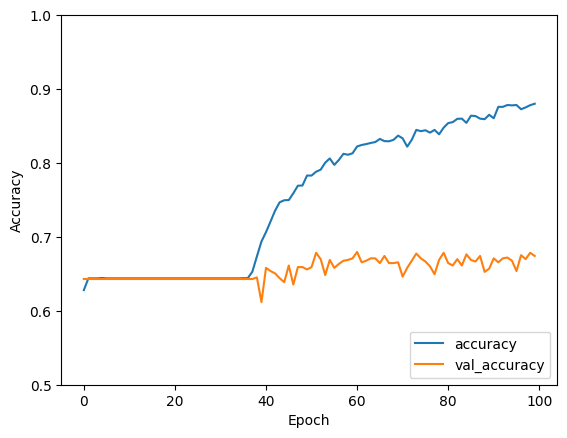

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
time_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 32)            122912    
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8

In [8]:
import numpy as np
predictions = time_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i]) + " | " +  "REAL: " + str(y_test[i]))

6/6 [==============================] - 0s 3ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTI

In [9]:
test_loss, test_acc = time_cnn.model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

6/6 [==============================] - 0s 3ms/step - loss: 0.7518 - accuracy: 0.7158
Test accuracy: 0.7157894968986511
Test loss: 0.7517989277839661


### Metrics:

In [10]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, time_cnn.name(), "time")
metrics.all_metrics()

True Positives: 43
True Negatives: 93
False Positives: 24
False Negatives: 30
total Samples: 190
Accuracy: 0.7157894736842105
Precision: 0.6417910447761194
Sensitivity: 0.589041095890411
Specificity: 0.7948717948717948
TPR: 0.6417910447761194
FPR: 0.20512820512820512
F1-Score: 0.6462592551663167


ROC curve

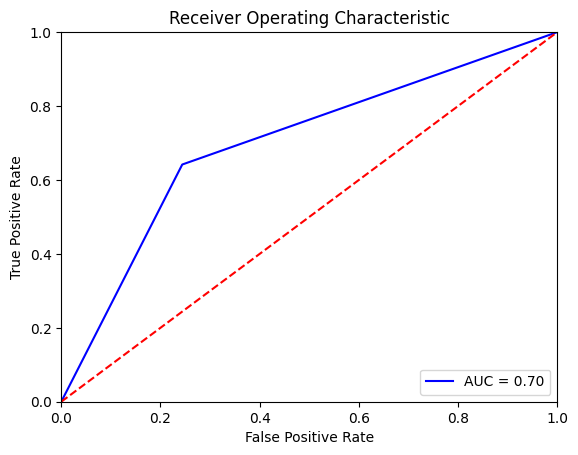

In [11]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()